In [10]:
# multivariate output stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from math import exp,sin,cos
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import numpy as np
from matplotlib import pyplot
from keras.layers.core import Dense, Activation, Dense, Dropout, Flatten
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [12]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
r = 50
a = 1000

in_seq1 = []
in_seq2 = []
out_seq = []
X1 = []
X2 = []
y1 = []
y2 = []

pi = 3.14159265359

c = pi/180

for i in range(2000):
    in_seq1.append(r*(cos(i*c)))
    in_seq2.append(r*(sin(i*c)))
    out_seq.append(i*a)
        
in_seq1 = scale(in_seq1)
in_seq2 = scale(in_seq2)
out_seq = scale(out_seq)
i = int(1000-(1000/3))

#for i in range(1000):
#   in_seq1.append(2*i)
#   in_seq2.append(i)
#   out_seq.append(i*3)

    
# convert to [rows, columns] structure
in_seq1 = np.reshape(in_seq1,((len(in_seq1), 1)))
in_seq2 = np.reshape(in_seq2,((len(in_seq2), 1)))
out_seq = np.reshape(out_seq,((len(out_seq), 1)))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps_in = 15
n_steps_out = 2
# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
X1 = X[0:667]
X2 = X[667:1000]
y1 = y[0:667]
y2 = y[667:1000]
n_features = X1.shape[2]
print()

()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30)                4080      
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 2, 30)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 30)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 60)             21840     
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 60)             0         
_________________________________________________________________
time_distributed_1 (T

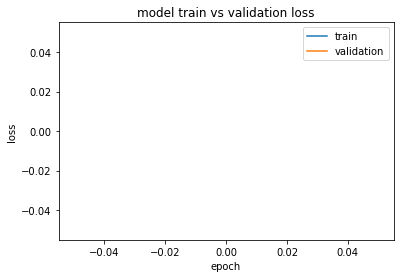

In [13]:

model = Sequential()
model.add(LSTM(30, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')
model.summary()
history = model.fit(X1, y1, epochs=50, verbose=1,validation_data=(X2, y2))
pyplot.plot(history.history['loss'][50:])
pyplot.plot(history.history['val_loss'][50:])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()


In [15]:
# demonstrate prediction
#x_input = array([[70,75,145], [80,85,165], [90,95,185]])
x_input = array([[50.0000000, 0.0000000000, 0.00000000],
 [49.9923848, 8.72620322, 1000.00000],
 [49.9695414, 1.74497484, 2000.00000],
 [49.9314767, 2.61679781, 3000.00000],
 [49.8782025, 3.48782369, 4000.00000],
 [49.8097349, 4.35778714, 5000.00000],
 [49.7260948, 5.22642316, 6000.00000],
 [49.6273076, 6.09346717, 7000.00000],
 [49.5134034, 6.95865505, 8000.00000],
 [49.3844170, 7.82172325, 9000.00000],
 [49.2403877, 8.68240888, 1000.00000],
 [49.0813592, 9.54044977, 1100.00000],
 [48.9073800, 1.03955845, 1200.00000],
 [48.7185032, 1.12475527, 1300.00000],
 [48.5147863, 1.20960948, 1400.00000]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = []
yhat = model.predict(x_input, verbose=1)

1/1 [==============================] - 0s 4ms/step
